In [33]:
threads = 16
import os
os.environ["MKL_NUM_THREADS"] = str(threads)
os.environ["NUMEXPR_NUM_THREADS"] = str(threads)
os.environ["OMP_NUM_THREADS"] = str(threads)


import Functions as fn
import numpy as np
import CRUMPET
import matplotlib.pyplot as plt
import fc_mapping as fc
import scipy.interpolate as interpolate
import scipy.integrate as integrate

In [34]:
#default Eirene setup with Eirene rates
fn.gen_input('input_Eirene.dat', vibr_hyd=True, incl_ground=False, diss_hyd=True,diss_ion=False,mol_cx_hyd=True,ion_hyd=True,MA=False,MolIonR=True)
crm_Eirene = CRUMPET.Crumpet('input_Eirene.dat')

['H2VIBR_OR', 'H.2', '2.0v1']
['H2VIBR_OR', 'H.2', '2.1v0']
['H2VIBR_OR', 'H.2', '2.1v2']
['H2VIBR_OR', 'H.2', '2.2v1']
['H2VIBR_OR', 'H.2', '2.2v3']
['H2VIBR_OR', 'H.2', '2.3v2']
['H2VIBR_OR', 'H.2', '2.3v4']
['H2VIBR_OR', 'H.2', '2.4v3']
['H2VIBR_OR', 'H.2', '2.4v5']
['H2VIBR_OR', 'H.2', '2.5v4']
['H2VIBR_OR', 'H.2', '2.5v6']
['H2VIBR_OR', 'H.2', '2.6v5']
['H2VIBR_OR', 'H.2', '2.6v7']
['H2VIBR_OR', 'H.2', '2.7v6']
['H2VIBR_OR', 'H.2', '2.7v8']
['H2VIBR_OR', 'H.2', '2.8v7']
['H2VIBR_OR', 'H.2', '2.8v9']
['H2VIBR_OR', 'H.2', '2.9v8']
['H2VIBR_OR', 'H.2', '2.9v10']
['H2VIBR_OR', 'H.2', '2.10v9']
['H2VIBR_OR', 'H.2', '2.10v11']
['H2VIBR_OR', 'H.2', '2.11v10']
['H2VIBR_OR', 'H.2', '2.11v12']
['H2VIBR_OR', 'H.2', '2.12v11']
['H2VIBR_OR', 'H.2', '2.12v13']
['H2VIBR_OR', 'H.2', '2.13v12']
['H2VIBR_OR', 'H.2', '2.13v14']
['H2VIBR_OR', 'H.2', '2.14v13']
['H2VIBR_OR', 'H.2', '2.0l2']
['H2VIBR_OR', 'H.2', '2.1l2']
['H2VIBR_OR', 'H.2', '2.2l2']
['H2VIBR_OR', 'H.2', '2.3l2']
['H2VIBR_OR', 'H.2', '

100%|██████████| 15/15 [00:00<00:00, 16652.87it/s]


Constructing functional emissivity matrix


100%|██████████| 15/15 [00:00<00:00, 21006.53it/s]


Constructing functional energy transfer matrix


100%|██████████| 15/15 [00:00<00:00, 18938.76it/s]


In [35]:
#setup with Eirene rates and Ichihara molecular CX as well as H- (Laporta)
fn.gen_input('input_Eirene_MolCXIchi_HminLaporta.dat', vibr_hyd=True, incl_ground=False, diss_hyd=True,diss_ion=False,mol_cx=True,ion_hyd=True,diss_att_X1=True,MA=False,MA_min=False,MolIonR=True)
crm_Eirene_MolCXIchi_HminLaporta = CRUMPET.Crumpet('input_Eirene_MolCXIchi_HminLaporta.dat')

['H2VIBR_OR', 'H.2', '2.0v1']
['H2VIBR_OR', 'H.2', '2.1v0']
['H2VIBR_OR', 'H.2', '2.1v2']
['H2VIBR_OR', 'H.2', '2.2v1']
['H2VIBR_OR', 'H.2', '2.2v3']
['H2VIBR_OR', 'H.2', '2.3v2']
['H2VIBR_OR', 'H.2', '2.3v4']
['H2VIBR_OR', 'H.2', '2.4v3']
['H2VIBR_OR', 'H.2', '2.4v5']
['H2VIBR_OR', 'H.2', '2.5v4']
['H2VIBR_OR', 'H.2', '2.5v6']
['H2VIBR_OR', 'H.2', '2.6v5']
['H2VIBR_OR', 'H.2', '2.6v7']
['H2VIBR_OR', 'H.2', '2.7v6']
['H2VIBR_OR', 'H.2', '2.7v8']
['H2VIBR_OR', 'H.2', '2.8v7']
['H2VIBR_OR', 'H.2', '2.8v9']
['H2VIBR_OR', 'H.2', '2.9v8']
['H2VIBR_OR', 'H.2', '2.9v10']
['H2VIBR_OR', 'H.2', '2.10v9']
['H2VIBR_OR', 'H.2', '2.10v11']
['H2VIBR_OR', 'H.2', '2.11v10']
['H2VIBR_OR', 'H.2', '2.11v12']
['H2VIBR_OR', 'H.2', '2.12v11']
['H2VIBR_OR', 'H.2', '2.12v13']
['H2VIBR_OR', 'H.2', '2.13v12']
['H2VIBR_OR', 'H.2', '2.13v14']
['H2VIBR_OR', 'H.2', '2.14v13']
['H2VIBR', 'H.2', '2.0q6']
['H2VIBR', 'H.2', '2.1q6']
['H2VIBR', 'H.2', '2.2q6']
['H2VIBR', 'H.2', '2.3q6']
['H2VIBR', 'H.2', '2.4q6']
['H2VIB

100%|██████████| 16/16 [00:00<00:00, 12987.97it/s]


Constructing functional emissivity matrix


100%|██████████| 16/16 [00:00<00:00, 16561.91it/s]


Constructing functional energy transfer matrix


100%|██████████| 16/16 [00:00<00:00, 15749.56it/s]


In [36]:
crm_Eirene_MolCXIchi_HminLaporta = CRUMPET.Crumpet('input_Eirene_MolCXIchi_HminLaporta.dat')
#Compute vibrational distribution as function of T (assumes Ti=Te, accounts for deuterium ion mass)
Te_reso = 100
Tev = 10**np.linspace(np.log10(0.1), np.log10(100), Te_reso)
iso_mass=2
Tiv = Tev/2
ne = 5e19

fv_H2_MolCXIchi_HminLaporta = np.ones([15,len(Tev)])
fv_H2 = np.ones([15,len(Tev)])
for i in range(0,len(Tev)):
    fv_H2_MolCXIchi_HminLaporta[1:,i]=crm_Eirene_MolCXIchi_HminLaporta.steady_state(Tev[i],ne*1e-6,Ti=Tiv[i], plot=False,dt=True)[0:14]
    fv_H2[1:,i]=crm_Eirene.steady_state(Tev[i],ne*1e-6,Ti=Tiv[i], plot=False,dt=True)[0:14]


['H2VIBR_OR', 'H.2', '2.0v1']
['H2VIBR_OR', 'H.2', '2.1v0']
['H2VIBR_OR', 'H.2', '2.1v2']
['H2VIBR_OR', 'H.2', '2.2v1']
['H2VIBR_OR', 'H.2', '2.2v3']
['H2VIBR_OR', 'H.2', '2.3v2']
['H2VIBR_OR', 'H.2', '2.3v4']
['H2VIBR_OR', 'H.2', '2.4v3']
['H2VIBR_OR', 'H.2', '2.4v5']
['H2VIBR_OR', 'H.2', '2.5v4']
['H2VIBR_OR', 'H.2', '2.5v6']
['H2VIBR_OR', 'H.2', '2.6v5']
['H2VIBR_OR', 'H.2', '2.6v7']
['H2VIBR_OR', 'H.2', '2.7v6']
['H2VIBR_OR', 'H.2', '2.7v8']
['H2VIBR_OR', 'H.2', '2.8v7']
['H2VIBR_OR', 'H.2', '2.8v9']
['H2VIBR_OR', 'H.2', '2.9v8']
['H2VIBR_OR', 'H.2', '2.9v10']
['H2VIBR_OR', 'H.2', '2.10v9']
['H2VIBR_OR', 'H.2', '2.10v11']
['H2VIBR_OR', 'H.2', '2.11v10']
['H2VIBR_OR', 'H.2', '2.11v12']
['H2VIBR_OR', 'H.2', '2.12v11']
['H2VIBR_OR', 'H.2', '2.12v13']
['H2VIBR_OR', 'H.2', '2.13v12']
['H2VIBR_OR', 'H.2', '2.13v14']
['H2VIBR_OR', 'H.2', '2.14v13']
['H2VIBR', 'H.2', '2.0q6']
['H2VIBR', 'H.2', '2.1q6']
['H2VIBR', 'H.2', '2.2q6']
['H2VIBR', 'H.2', '2.3q6']
['H2VIBR', 'H.2', '2.4q6']
['H2VIB

100%|██████████| 16/16 [00:00<00:00, 14045.39it/s]


Constructing functional emissivity matrix


100%|██████████| 16/16 [00:00<00:00, 16840.37it/s]


Constructing functional energy transfer matrix


100%|██████████| 16/16 [00:00<00:00, 15498.58it/s]


15


Text(0.5, 1.0, 'Eirene - Default')

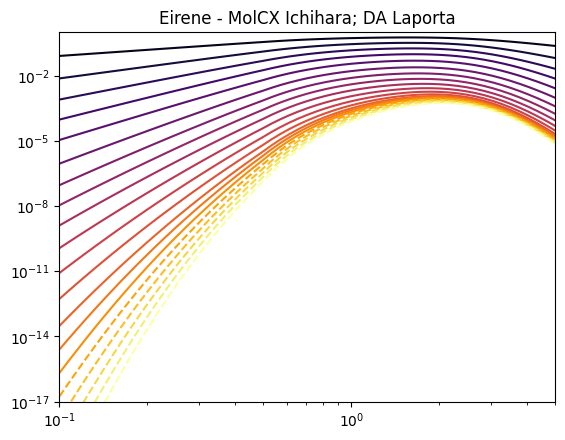

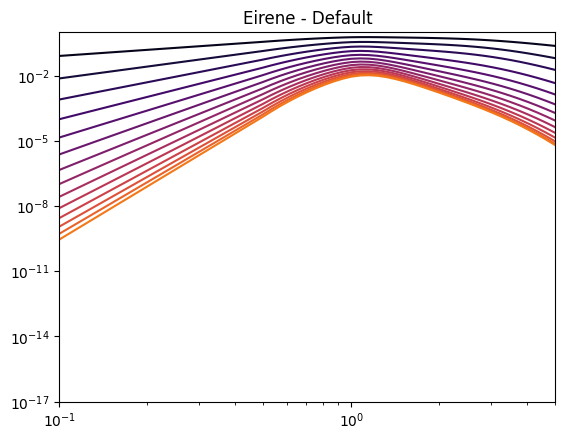

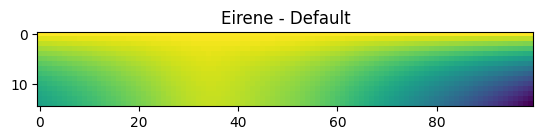

In [37]:
#Extrapolate vibrational distribution - required for Hmin calculation
from scipy.interpolate import interp1d
import numpy as np
lvl = np.linspace(0,14,15)
fv_H2_extrap_MolCXIchi_HminLaporta = np.zeros([21,len(Tev)])
fv_H2_extrap = np.zeros([21,len(Tev)])
for i in range(0,len(Tev)):
    f = interp1d(lvl,np.log(fv_H2_MolCXIchi_HminLaporta[:,i]),bounds_error=False,fill_value='extrapolate')
    fv_H2_extrap_MolCXIchi_HminLaporta[:,i] = np.exp(f(np.linspace(0,20,21)))
    #fv_H2_extrap_MolCXIchi_HminLaporta[:,i] = fv_H2_extrap_MolCXIchi_HminLaporta[:,i] / sum(fv_H2_extrap_MolCXIchi_HminLaporta[:,i])
    f = interp1d(lvl,np.log(fv_H2[:,i]),bounds_error=False,fill_value='extrapolate')
    fv_H2_extrap[:,i] = np.exp(f(np.linspace(0,20,21)))
    #fv_H2_extrap[:,i] = fv_H2_extrap[:,i] / sum(fv_H2_extrap[:,i])


#visualise vibrational distribution - extrapolated
import matplotlib.pyplot as plt
plt.figure()
colors = plt.cm.inferno(np.linspace(0,1,np.shape(fv_H2_extrap_MolCXIchi_HminLaporta)[0]))
for i in range(1,np.shape(fv_H2_extrap_MolCXIchi_HminLaporta)[0]):
    if i<16:
        plt.loglog(Tev,np.transpose(fv_H2_extrap_MolCXIchi_HminLaporta[i,:]),'-',color=colors[i,:])
    if i>=16:
        plt.loglog(Tev,np.transpose(fv_H2_extrap_MolCXIchi_HminLaporta[i,:]),'--',color=colors[i,:])
plt.axis([0.1,5,1e-17,1])
plt.title('Eirene - MolCX Ichihara; DA Laporta')
plt.savefig('MolCX_Ichihara_VibrDist.eps')

plt.figure()
print(np.shape(fv_H2)[0])
for i in range(1,np.shape(fv_H2)[0]):
    if i<16:
        plt.loglog(Tev,np.transpose(fv_H2[i,:]),'-',color=colors[i,:])
plt.axis([0.1,5,1e-17,1])
plt.title('Eirene - Default')
plt.savefig('Eirene_VibrDist.eps')

plt.figure()
plt.imshow(np.log(fv_H2))
plt.title('Eirene - Default')


1.6935161538781153e-16


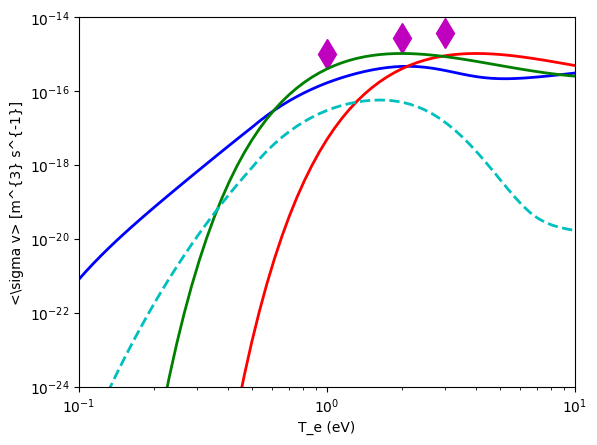

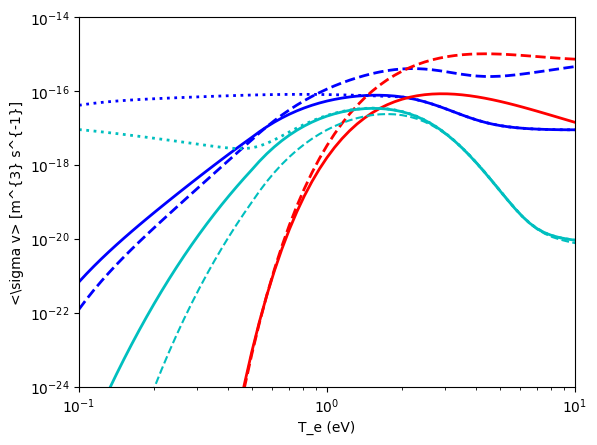

In [38]:
#Compute effective rates - MAR & MAD

#codes for evaluating Eirene-like fits
def eval_2D(coeff, T, n):
    '''
    Function to evaluate 2D polynomial logarithmic fits of reaction rate coefficients of the type in Eirene data files (e.g. AMJUEL).
    In this case, the rate coefficients have both a temperature and density dependence.

        Parameters
        ----------
        coeff: numpy array
            Fit constants of the rate coefficients. (For Eirene data, this is an 8x8 array)
        T: float
            Evaluation temperature in eV (may also be an array of temperatures).
        n: float
            Evaluation density in m^-3 (may also be an array of densities).

        Output
        ------
        Reaction rate coefficient(s) in m^3s^-1.
    '''

    o = np.zeros(np.shape(T))
    for i in range(0, np.shape(coeff)[0]):
        for j in range(0, np.shape(coeff)[1]):
            o = o + coeff[i, j] * (np.log(T) ** i) * (np.log(n * 1e-14) ** j)
    return 1e-6 * np.exp(o)

def eval_1D(coeff, T):
    o = np.zeros(np.shape(T))
    for i in range(0, len(coeff)):
        o = o + coeff[i] * (np.log(T) ** i)
    return 1e-6 * np.exp(o)

#Load in reaction sets
H2VIBR_custom = CRUMPET.ratedata.RateData(rates={'H2VIBR' : '/rates/h2vibr_custom.tex'})
H2VIBR_original = CRUMPET.ratedata.RateData(rates={'H2VIBR_OR' : '/rates/h2vibr.tex'})
AMJUEL = CRUMPET.ratedata.RateData(rates={'AMJUEL' : '/rates/amjuel.tex'})

nev = ne*np.ones(np.shape(Tev))

#Compute effective dissociative attachment and molecular CX rates
da_rate = np.zeros(np.shape(Tev))

for i in range(0,len(Tev)):
    for j in range(0,21):
        da_rate[i] = da_rate[i] + eval_1D(H2VIBR_custom.reactions['H2VIBR']['H.2']['2.'+str(j)+'L4'], Tev[i])*fv_H2_extrap_MolCXIchi_HminLaporta[j,i]

cx_rate_Ichi = np.zeros(np.shape(Tev))

for i in range(0,len(Tev)):
    for j in range(0,15):
        cx_rate_Ichi[i] = cx_rate_Ichi[i] + eval_1D(H2VIBR_custom.reactions['H2VIBR']['H.2']['2.'+str(j)+'Q6'], Tev[i]/2)*fv_H2_extrap_MolCXIchi_HminLaporta[j,i]

#form vibrational distribution that is capped below a certain temperature, to mimick the effect of transport of vibrationally excited molecules
Te_cap = 2
fv_H2_extrap_MolCXIchi_HminLaporta_cap = np.zeros([21,len(Tev)])
for i in range(0,len(Tev)):
    if Tev[i]>Te_cap:
        fv_H2_extrap_MolCXIchi_HminLaporta_cap[:,i] = fv_H2_extrap_MolCXIchi_HminLaporta[:,i]
    else:
        fv_H2_extrap_MolCXIchi_HminLaporta_cap[:,i] = fv_H2_extrap_MolCXIchi_HminLaporta[:,np.argmin(np.abs(Te_cap-Tev))]

        
#Compute effective dissociative attachment and molecular CX rates
da_rate_cap = np.zeros(np.shape(Tev))

for i in range(0,len(Tev)):
    for j in range(0,21):
        da_rate_cap[i] = da_rate[i] + eval_1D(H2VIBR_custom.reactions['H2VIBR']['H.2']['2.'+str(j)+'L4'], Tev[i])*fv_H2_extrap_MolCXIchi_HminLaporta_cap[j,i]

cx_rate_Ichi_cap = np.zeros(np.shape(Tev))

for i in range(0,len(Tev)):
    for j in range(0,15):
        cx_rate_Ichi_cap[i] = cx_rate_Ichi_cap[i] + eval_1D(H2VIBR_custom.reactions['H2VIBR']['H.2']['2.'+str(j)+'Q6'], Tev[i]/2)*fv_H2_extrap_MolCXIchi_HminLaporta_cap[j,i]

h2ioni_rate_Ichi = np.zeros(np.shape(Tev))

for i in range(0,len(Tev)):
    for j in range(0,15):
        h2ioni_rate_Ichi[i] = h2ioni_rate_Ichi[i] + eval_1D(H2VIBR_original.reactions['H2VIBR_OR']['H.2']['2.'+str(j)+'L4'], Tev[i])*fv_H2_extrap_MolCXIchi_HminLaporta[j,i]

       
cx_rate_Eirene = eval_1D(AMJUEL.reactions['AMJUEL']['H.2']['3.2.3'],Tiv)
h2ioni_rate_Eirene = eval_2D(AMJUEL.reactions['AMJUEL']['H.4']['2.2.9'],Tev,nev)

H2p_Depletion = (eval_2D(AMJUEL.reactions['AMJUEL']['H.4']['2.2.14'],Tev,nev) + eval_2D(AMJUEL.reactions['AMJUEL']['H.4']['2.2.12'],Tev,nev) + eval_2D(AMJUEL.reactions['AMJUEL']['H.4']['2.2.11'],Tev,nev))
Hm_Depletion = (eval_2D(AMJUEL.reactions['AMJUEL']['H.4']['7.2.3A'],Tev,nev) + eval_2D(AMJUEL.reactions['AMJUEL']['H.4']['7.2.3B'],Tev,nev))

MAR_H2p_Eirene = (cx_rate_Eirene/H2p_Depletion)*eval_2D(AMJUEL.reactions['AMJUEL']['H.4']['2.2.14'],Tev,nev)
MAR_H2p_Ichi = (cx_rate_Ichi/H2p_Depletion)*eval_2D(AMJUEL.reactions['AMJUEL']['H.4']['2.2.14'],Tev,nev)
MAR_H2p_Ichi_cap = (cx_rate_Ichi_cap/H2p_Depletion)*eval_2D(AMJUEL.reactions['AMJUEL']['H.4']['2.2.14'],Tev,nev)

MAD_H2p_Eirene = (cx_rate_Eirene/H2p_Depletion)*eval_2D(AMJUEL.reactions['AMJUEL']['H.4']['2.2.12'],Tev,nev) + (h2ioni_rate_Eirene/H2p_Depletion)*eval_2D(AMJUEL.reactions['AMJUEL']['H.4']['2.2.14'],Tev,nev)
MAD_H2p_Ichi = (cx_rate_Ichi/H2p_Depletion)*eval_2D(AMJUEL.reactions['AMJUEL']['H.4']['2.2.12'],Tev,nev) + (h2ioni_rate_Ichi/H2p_Depletion)*eval_2D(AMJUEL.reactions['AMJUEL']['H.4']['2.2.14'],Tev,nev)

MAI_H2p_Eirene = (cx_rate_Eirene/H2p_Depletion)*eval_2D(AMJUEL.reactions['AMJUEL']['H.4']['2.2.11'],Tev,nev) + (h2ioni_rate_Eirene/H2p_Depletion)*(eval_2D(AMJUEL.reactions['AMJUEL']['H.4']['2.2.12'],Tev,nev) + 2*eval_2D(AMJUEL.reactions['AMJUEL']['H.4']['2.2.11'],Tev,nev))
MAI_H2p_Ichi = (cx_rate_Ichi/H2p_Depletion)*eval_2D(AMJUEL.reactions['AMJUEL']['H.4']['2.2.11'],Tev,nev) + (h2ioni_rate_Ichi/H2p_Depletion)*(eval_2D(AMJUEL.reactions['AMJUEL']['H.4']['2.2.12'],Tev,nev) + 2*eval_2D(AMJUEL.reactions['AMJUEL']['H.4']['2.2.11'],Tev,nev))

MAR_Hm = (da_rate/Hm_Depletion) * eval_2D(AMJUEL.reactions['AMJUEL']['H.4']['7.2.3A'],Tev,nev)
MAR_Hm_cap = (da_rate_cap/Hm_Depletion) * eval_2D(AMJUEL.reactions['AMJUEL']['H.4']['7.2.3A'],Tev,nev)
MAD_Hm = (da_rate/Hm_Depletion) * eval_2D(AMJUEL.reactions['AMJUEL']['H.4']['7.2.3B'],Tev,nev)

Te_Reiter = np.array([1,2,3])
MolCX_Reiter = np.array([10.48, 27.12, 38.08])*1e-10*1e-6

plt.figure()
plt.loglog(Te_Reiter,MolCX_Reiter,'md',markersize=15)
plt.loglog(Tev, cx_rate_Ichi,'b',linewidth=2)
plt.loglog(Tev, eval_1D(AMJUEL.reactions['AMJUEL']['H.2']['3.2.3'],Tiv),'r',linewidth=2)
plt.loglog(Tev, eval_1D(AMJUEL.reactions['AMJUEL']['H.2']['3.2.3'],Tev),'g',linewidth=2)
plt.loglog(Tev, da_rate, 'c--',linewidth=2)
plt.axis([0.1, 10, 1e-24, 1e-14])
plt.xlabel('T_e (eV)')
plt.ylabel('<\sigma v> [m^{3} s^{-1}]')
plt.savefig('MolCX_calculations.eps')

f = interp1d(Tev,cx_rate_Ichi)
print(f(1))

plt.figure()
plt.loglog(Tev,MAR_H2p_Ichi,'b',linewidth=2)
plt.loglog(Tev, MAD_H2p_Ichi,'b--',linewidth=2)
plt.loglog(Tev,MAR_H2p_Ichi_cap,'b:',linewidth=2)
#plt.loglog(Tev, MAI_H2p_Ichi,'b:')
plt.loglog(Tev,MAR_H2p_Eirene,'r',linewidth=2)
plt.loglog(Tev, MAD_H2p_Eirene,'r--',linewidth=2)
#plt.loglog(Tev, MAI_H2p_Eirene,'r:')
plt.loglog(Tev,MAR_Hm_cap,'c:',linewidth=2)
plt.loglog(Tev,MAR_Hm,'c',linewidth=2)
plt.loglog(Tev, MAD_Hm,'c--')
plt.axis([0.1, 10, 1e-24, 1e-14])
plt.xlabel('T_e (eV)')
plt.ylabel('<\sigma v> [m^{3} s^{-1}]')
plt.savefig('MAR_MAD_H2p_Hm.eps')


[ 0.         -0.25342346 -0.73201621 -1.19169118 -1.63283524 -2.05565472
 -2.46021409 -2.84648756 -3.21443645 -3.56398338 -3.89499939 -4.20725237
 -4.50039414 -4.7738444  -5.02681651]
1.5199110829529339
[6012.78336802]
[1.         0.5618245  0.31357177 0.17163528 0.09189495 0.05368273
 0.03373087 0.02261941 0.01608568 0.01206405 0.00949361 0.00780165
 0.0066658  0.00589816 0.00538633]
[1.00000000e+00 5.66508468e-01 3.19311032e-01 1.77127243e-01
 9.51007890e-02 4.78973493e-02 2.35926910e-02 1.23341612e-02
 6.80713014e-03 3.94146882e-03 2.41466056e-03 1.60402914e-03
 1.17425096e-03 9.44474736e-04 8.28781892e-04 7.27260771e-04
 6.38175416e-04 5.60002516e-04 4.91405357e-04 4.31210964e-04
 3.78390046e-04]


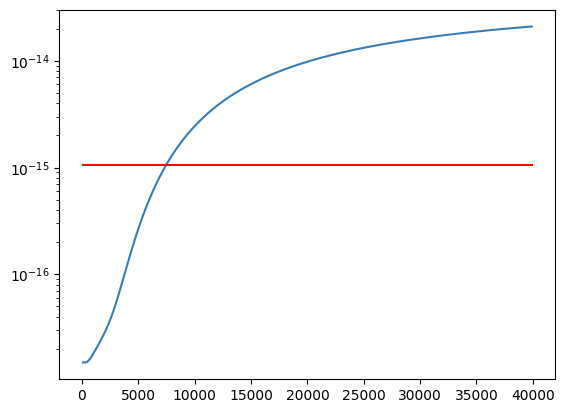

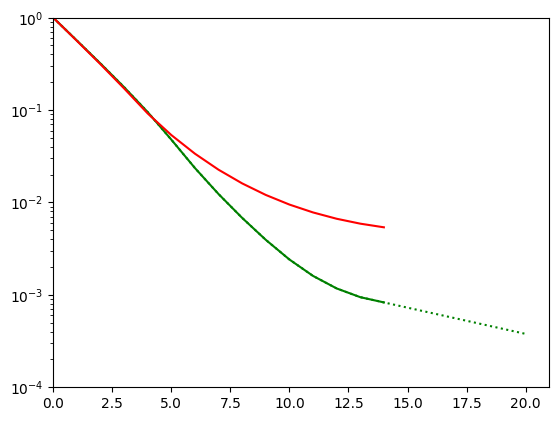

In [47]:
#attempt at recreating the MolCX Reiter rates

Te = 1 #1 eV

def vibr_boltzmann(T,DE=np.array([0, 4303, 8436, 12402, 16204, 19841, 23314, 26622, 29765, 32785, 35548, 38184, 40642, 42917, 44998, 46876, 48533, 49953, 51122, 52001, 52560])):
    return np.exp(-DE/(T))

H2_values = np.array([0, 0.27504, 0.79104, 1.27809, 1.73664, 2.16685, 2.56873, 2.94214, 3.28667, 3.60148, 3.88512, 4.13553, 4.34985, 4.52401, 4.65343, 4.72986])*11606
D2_values = np.array([0, 0.19652, 0.56765, 0.92411, 1.26620, 1.59408, 1.90780, 2.20734, 2.49267, 2.76373, 3.02042, 3.26256, 3.48988, 3.70193, 3.89810, 4.07762, 4.23957, 4.38257, 4.50504, 4.60581, 4.68166, 4.72989])*11606

Tv = np.arange(100,40000,100)

cx_rate_IchiTv = np.zeros(np.shape(Tv))
for i in range(0,len(Tv)):
    fv = vibr_boltzmann(Tv[i],DE=D2_values)
    fv = fv[0:15]/fv[0]
    for j in range(0,15):
        cx_rate_IchiTv[i] = cx_rate_IchiTv[i] + eval_1D(H2VIBR_custom.reactions['H2VIBR']['H.2']['2.'+str(j)+'Q6'], Te)*fv[j]

plt.semilogy(Tv,cx_rate_IchiTv)
MolCX_Reiter_p = np.interp(Te,Te_Reiter,MolCX_Reiter)
plt.hlines(MolCX_Reiter_p,0,40000,'r')

#fit vibrational temperature Eirene
def fit_model(x,a):
    fv = vibr_boltzmann(a,DE=D2_values)[0:len(x)]
    return np.log(fv/fv[0])

print(fit_model(np.arange(0,15),9000))

indx = 39
print(Tev[indx])
from scipy.optimize import curve_fit
o,_ = curve_fit(fit_model,np.arange(0,15),np.log(fv_H2_extrap_MolCXIchi_HminLaporta[:15,indx]),p0=9000,bounds=(100,2e5),method='trf')

print(o)
plt.figure()
#plt.semilogy(np.exp(fit_model(np.arange(0,15),o)))
plt.semilogy(np.linspace(0,20,21),fv_H2_extrap_MolCXIchi_HminLaporta[:,indx],'g:')
plt.semilogy(np.linspace(0,14,15),fv_H2_extrap_MolCXIchi_HminLaporta[:15,indx],'g')
plt.semilogy(np.linspace(0,14,15),fv_H2[:,indx],'r')
plt.axis([0,21,1e-4,1])
plt.savefig('Vibr_Dist_1_5_eV.eps')

print(fv_H2[:,indx])
print(fv_H2_extrap_MolCXIchi_HminLaporta[:,indx])


In [40]:
#Write fit result
x = np.log(Tev)
y = np.log(cx_rate_Ichi*1e6)
fit  = np.flip(np.polyfit(x,y,8))

def numpy_to_string(): 
    part_1 = "\subsection{\n" +\
                f"Reaction 3.2.3d\n"+\
                f"$ D^+ + D_2 \\rightarrow D + D_2^+$ (dissociation)\n" +\
                "}\n"+\
                "Rate coeff. for E_(D2)=0.2 eV at rest, calculated using CRM with Ichihara data\n"+\
                "Elecron density is $10^{19}m^{-3}$\n"+\
                "Cross-sections have been rescaled for D2, assuming that the cross-sections are isotope independent at the same velocity and the same vibrational energy$\n"+\
                "\\begin{small}\\begin{verbatim}\n"+\
                "\n"
                
    part_2 =   "\n"+\
                "\\end{verbatim}\end{small}\n"+\
                "\n"+\
                "\\newpage\n"
    return part_1, part_2

string = numpy_to_string()[0]+fn.block_string(fit)+numpy_to_string()[1]
print(string)

# with open('fits.dat','a') as f:
#     f.write(string)

\subsection{
Reaction 3.2.3d
$ D^+ + D_2 \rightarrow D + D_2^+$ (dissociation)
}
Rate coeff. for E_(D2)=0.2 eV at rest, calculated using CRM with Ichihara data
Elecron density is $10^{19}m^{-3}$
Cross-sections have been rescaled for D2, assuming that the cross-sections are isotope independent at the same velocity and the same vibrational energy$
\begin{small}\begin{verbatim}

  b0 -2.243248061141D+01  b1  2.545688414555D+00  b2 -2.216781724343D+00
  b3  8.094600878109D-02  b4  3.716108170331D-01  b5 -4.844694654753D-02
  b6 -2.844817477677D-02  b7  7.978629385152D-03  b8 -5.719443248608D-04

\end{verbatim}\end{small}

\newpage


[-7.16104668e+00  2.41546867e+00 -3.93184846e+00  2.09659708e-01
  3.14669800e-01 -2.63862758e-02 -1.59870601e-02  3.18847406e-03
 -1.68160154e-04]
\subsection{
Reaction 7.0a
$ e^- + D2(v) \rightarrow D^- + D$, Dissociative attachment -> ratio $D^-/D2$
}
Ratio of densities: nD-/nD2. 
Vibr. distribution of D2(v): CRUMPET calculation (Eirene-like with Laporta dissociative attachment and molecular charge exchange from Ichihara. 
Dissociative attachment data from Laporta, 2021, PPCF 
Elecron density is $10^{19}m^{-3}$
\begin{small}\begin{verbatim}

  b0 -7.161046680156D+00  b1  2.415468671191D+00  b2 -3.931848462744D+00
  b3  2.096597080436D-01  b4  3.146697996624D-01  b5 -2.638627580676D-02
  b6 -1.598706010022D-02  b7  3.188474055341D-03  b8 -1.681601536219D-04

\end{verbatim}\end{small}

\newpage


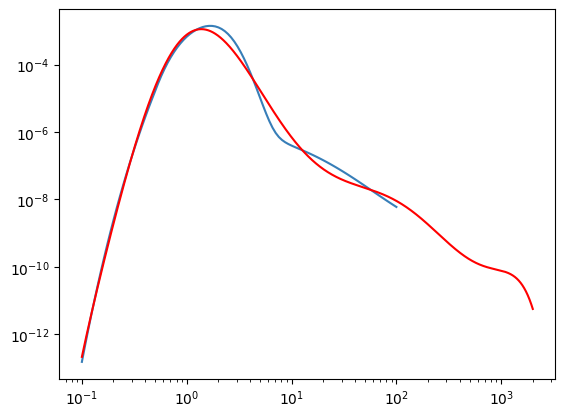

In [41]:
#calculate fraction of H- compared to H2, assuming ne=nH+, then write this into an Eirene entry

HmH2 = (da_rate/Hm_Depletion)
plt.figure()
plt.loglog(Tev,HmH2)

x = np.log(Tev)
y = np.log(HmH2)
f = interp1d(x,y,bounds_error=False,fill_value='extrapolate')
xn = np.linspace(np.log(0.1),np.log(2e3),10000)

fit  = np.flip(np.polyfit(xn,f(xn),8))
print(fit)

plt.loglog(np.exp(xn),1e6*eval_1D(fit,np.exp(xn)),'r')

def numpy_to_string(): 
    part_1 = "\subsection{\n" +\
                f"Reaction 7.0a\n"+\
                f"$ e^- + D2(v) \\rightarrow D^- + D$, Dissociative attachment -> ratio $D^-/D2$\n" +\
                "}\n"+\
                "Ratio of densities: nD-/nD2. \n" +\
                "Vibr. distribution of D2(v): CRUMPET calculation (Eirene-like with Laporta dissociative attachment and molecular charge exchange from Ichihara. \n"+\
                "Dissociative attachment data from Laporta, 2021, PPCF \n"+\
                "Elecron density is $10^{19}m^{-3}$\n"+\
                "\\begin{small}\\begin{verbatim}\n"+\
                "\n"
                
    part_2 =   "\n"+\
                "\\end{verbatim}\end{small}\n"+\
                "\n"+\
                "\\newpage\n"
    return part_1, part_2

string = numpy_to_string()[0]+fn.block_string(fit)+numpy_to_string()[1]
print(string)


1.6297508346206444
[6.92568796e-18 8.70812782e-18 1.46966561e-17 2.05534068e-17
 2.58113678e-17 8.54570672e-17 1.03146758e-16 5.92377089e-17
 3.34648260e-17 1.97835360e-17 1.22315884e-17 8.00005688e-18
 5.57916743e-18 4.18371184e-18 3.35460058e-18]


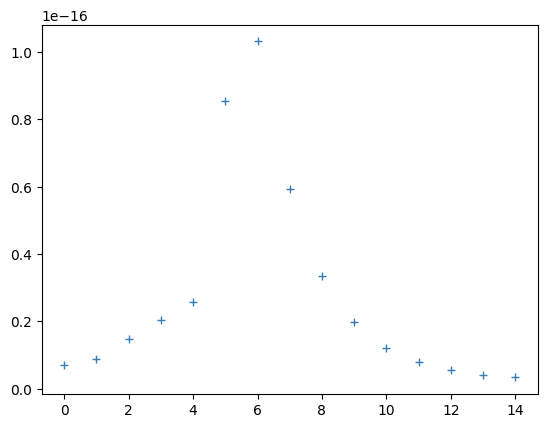

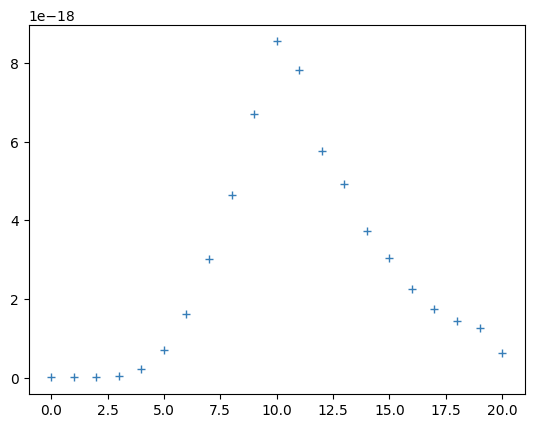

In [42]:
#show which levels contribute most]
indx=40
print(Tev[indx])

CX_contribute = np.zeros(15)
for j in range(0,15):
    CX_contribute[j] = eval_1D(H2VIBR_custom.reactions['H2VIBR']['H.2']['2.'+str(j)+'Q6'], Tev[indx]/2)*fv_H2_extrap_MolCXIchi_HminLaporta[j,indx]

print(CX_contribute)

plt.figure()
plt.plot(CX_contribute,'+')

DA_contribute = np.zeros(21)
for j in range(0,21):
    DA_contribute[j] =  eval_1D(H2VIBR_custom.reactions['H2VIBR']['H.2']['2.'+str(j)+'L4'], Tev[indx])*fv_H2_extrap_MolCXIchi_HminLaporta[j,indx]

plt.figure()
plt.plot(DA_contribute,'+')